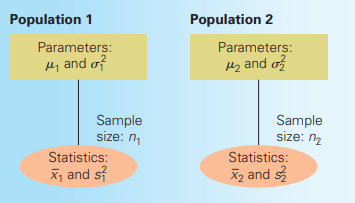

In [1]:
from IPython.display import Image
Image(filename='IDS.png')

Inference about difference between two means
- Independent samples
- Sampling distribution of x1bar-x2bar is normally distributed if populations are normally distributed or approx. normally distributed.

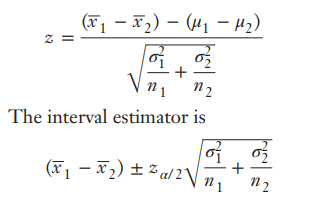

In [2]:
#Independent samples of large size n>=30
Image(filename='z test.png')

In [3]:
#Null Hypothesis: Reaction time is same for drivers who use cell phones compared to who don't.
#Alternative Hyp: Reaction time is slower for drivers who use cell phones compared to who don't.

In [4]:
import pandas as pd
import numpy as np

In [5]:
two=pd.read_excel('Hypothesis Testing.xlsx',sheet_name='Two sample z').iloc[:,0:2]

In [6]:
two.shape

(125, 2)

In [7]:
#Manual
z=((two['Phone'].mean()-two['Not'].mean())-0)/np.sqrt((two['Phone'].var()/125)+(two['Not'].var()/125))
z

7.0668652773518135

In [8]:
from statsmodels.stats import weightstats as test
test.ztest(x1=two['Phone'],x2=two['Not'])

(7.0668652773518135, 1.5847266628621651e-12)

In [9]:
#P value < alpha=0.05

Two independent samples: n<30

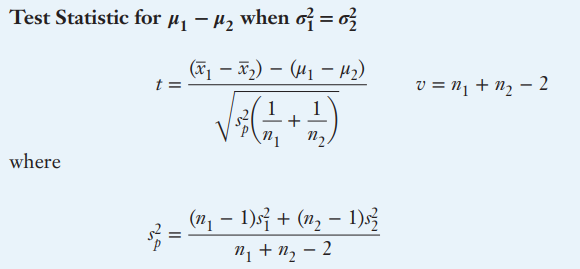

In [10]:
Image(filename='equal.png')

In [11]:
#If n1,n2<30, compare two means of population assuming that variance of the population are equal

In [12]:
df=pd.read_excel('Hypothesis Testing.xlsx',sheet_name='Two sample t').iloc[:,0:2]


In [13]:
#Null hypothesis: Percentage of tip paid are same
#Alternative hyp: Percentage of tip paid by device are higher

In [14]:
n1=10
n2=11

In [15]:
#Pooled sample variance
sp2=((10-1)*df['Usual'].var()+(11-1)*df['Device'].var())/(n1+n2-2)
sp2

2.769263157894736

In [16]:
t=(df['Usual'].mean()-df['Device'].mean() - 0)/np.sqrt(sp2*((1/n1)+(1/n2)))
t

-2.17300971633649

In [17]:
#Degrees of freedom
v=n1+n2-2
v

19

In [18]:
t,v #p-value 0.05

(-2.17300971633649, 19)

In [19]:
df

Usual  Device
0    10.3    13.6
1    15.2    15.7
2    13.0    12.9
3     9.9    13.2
4    12.1    12.9
5    13.4    13.4
6    12.2    12.1
7    14.9    13.9
8    13.2    15.7
9    12.0    15.4
10    NaN    17.4

In [20]:
#Two sample t test: Independent samples assuming equal variance
from scipy.stats import ttest_ind
ttest_ind(df['Usual'].dropna(),df['Device'])

Ttest_indResult(statistic=-2.17300971633649, pvalue=0.04263401479924383)

In [21]:
#p value 0.0426 < alpha=0.05

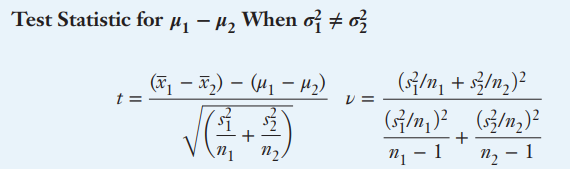

In [22]:
#Two sample t test: Independent samples assuming unequal variance
Image(filename='unequal.png')

In [23]:
#Unequal variance
ttest_ind(df['Usual'].dropna(),df['Device'],equal_var=False)

Ttest_indResult(statistic=-2.1662629207750594, pvalue=0.043566934341211526)

In [24]:
# p value 0.0435 < alpha=0.05

Two sample t test:Dependent samples

In [25]:
paired=pd.read_excel('Hypothesis Testing.xlsx',sheet_name='Paired').iloc[:,0:2]
paired

Affected  Not affected
0       488           484
1       478           478
2       480           492
3       426           444
4       440           436
5       410           398
6       458           464
7       460           476

In [26]:
#Null: Corneal thickness of affected and non affected eyes are same.
#Alter: There is a significant difference

In [27]:
# t=(x_d - mu_d)/(std_d/sqrt(n))

In [28]:
paired['d']=paired['Affected']-paired['Not affected']
paired

Affected  Not affected   d
0       488           484   4
1       478           478   0
2       480           492 -12
3       426           444 -18
4       440           436   4
5       410           398  12
6       458           464  -6
7       460           476 -16

In [29]:
t=(paired['d'].mean() - 0)/(paired['d'].std()/np.sqrt(8))
t

-1.0530483802224422

In [30]:
from scipy.stats import ttest_rel
ttest_rel(paired['Affected'],paired['Not affected'])

Ttest_relResult(statistic=-1.0530483802224422, pvalue=0.3273052835221897)

In [31]:
#p value 0.327 > alpha=0.05 then accept null

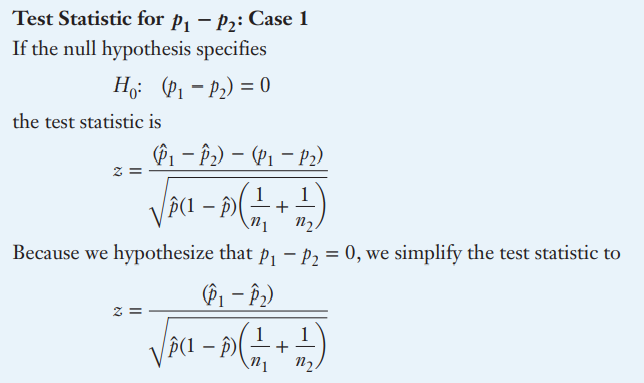

In [32]:
Image(filename='pop proportion.png')

In [33]:
#Null:Smokers and non smokers have equal risk of suffering heart disease.
#Alter: Smokers will have higher risk of suffering from heart disease.

In [37]:
#Proportion of smokers who suffered from heart disease
p1=18/80
p1

0.225

In [38]:
#Proportion of non smokers who suffered from heart disease
p2=15/120
p2

0.125

In [39]:
#Proportion of mens suffered from heart disease
p=(18+15)/(80+120)
p

0.165

In [40]:
z=((p1-p2)-0)/np.sqrt(p*(1-p)*((1/80)+(1/120)))
z

1.8665318664550323

In [41]:
#z score at 5% -->
from scipy.stats import norm
norm.ppf(0.975)

1.959963984540054

In [42]:
# calculated z=1.86 is less than table value 1.96. Hence accept the null.

In [43]:
one=pd.read_excel('Hypothesis Testing.xlsx',sheet_name='One way').iloc[:,0:5]
one

X1     X2     X3     X4   X5
0    80.0  150.0   48.0  100.0   25
1   125.0   40.0   35.0   96.0   80
2    35.0  120.0   95.0   35.0   30
3    58.0   75.0   45.0   99.0   35
4   110.0  160.0   75.0   75.0   30
5   140.0   60.0  115.0  150.0   28
6    97.0   45.0   42.0   45.0   20
7    50.0  100.0   78.0  100.0   75
8    65.0   86.0   65.0  120.0   48
9    79.0   87.0  125.0   50.0   20
10   35.0   90.0    NaN    NaN   50
11   85.0    NaN    NaN    NaN   75
12  120.0    NaN    NaN    NaN   55
13    NaN    NaN    NaN    NaN   60
14    NaN    NaN    NaN    NaN   85
15    NaN    NaN    NaN    NaN  110

Between Group Variance (SSB)
1. Calculate a Grand Mean for all observations across all groups
2. Subtract each grand mean from each sample mean
3. Square these differences
4. Multiply each squared score by sample size
5. Add them all up

In [49]:
#1. sum of all non missing cells/ # non missing cells to get grand mean
gmean=one.sum(axis=1).sum()/one.count().sum()
gmean

75.18333333333334

In [50]:
colmeans=one.mean()
colmeans

X1    83.000000
X2    92.090909
X3    72.300000
X4    87.000000
X5    51.625000
dtype: float64

In [51]:
type(colmeans)

pandas.core.series.Series

In [53]:
type(gmean)

numpy.float64

In [63]:
#2.
ssb=pd.DataFrame(colmeans).T.sub(gmean,axis=1)**2
ssb

X1          X2        X3          X4          X5
0  61.100278  285.866118  8.313611  139.633611  554.995069

In [64]:
one.count()

X1    13
X2    11
X3    10
X4    10
X5    16
dtype: int64

In [65]:
ssb=ssb.multiply(one.count(),axis=1).sum(axis=1)
ssb 

0    14298.224242
dtype: float64

Within Group variance (SSW)
1. Calculate the Mean for each group
2. Subtract each sample mean from every score in that group
3. Square the difference
4. Add up all the squared Differences

In [66]:
colmeans

X1    83.000000
X2    92.090909
X3    72.300000
X4    87.000000
X5    51.625000
dtype: float64

In [72]:
ssw=one.sub(colmeans,axis=1)**2
ssw=ssw.sum().sum()
ssw

60560.759090909094

In [73]:
dfb=5-1

In [80]:
dfw=one.count().sum()-5
dfw

55

In [81]:
#MSB: SSB/dfb
msb=ssb/dfb
msb

0    3574.556061
dtype: float64

In [82]:
#MSW: SSW/dfw
msw=ssw/dfw
msw

1101.1047107438017

In [83]:
#Test stat for ANOVA = MSB/MSW
msb/msw

0    3.246336
dtype: float64

In [86]:
from scipy.stats import f_oneway
f_oneway(one['X1'].dropna(),one['X2'].dropna(),one['X3'].dropna(),one['X4'].dropna(),one['X5'])

F_onewayResult(statistic=3.246336180136248, pvalue=0.018391232905488122)

In [ ]:
# p value 0.0184 < alpha=0.05 